In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHisto(n, circuit):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circuit, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [7]:
def quantumPhaseEstimator(n, angle):
    circ = QuantumCircuit(n, n-1)
    circ.x(n-1)
    circ.h(range(0, n-1))
    angle = pi*angle
    
    #controlled phase gates
    for i in range(0, n-1):
        for j in range(2**i):
            circ.cp(angle, i, n-1)
   
    
    #inverse qft
    circ.barrier()
    for i in range(0, n//2):
        circ.swap(i, n-i-1)
    for i in range(n):
        for j in range(i):
            circ.cp(-pi/float(2**(i-j)), i, j)
        circ.h(i)
    circ.barrier()
    
    #measures
    circ.measure(range(0, n-1), range(0, n-1))
    return circ

In [14]:
circuit = quantumPhaseEstimator(4, 5.5/8)

In [15]:
#circuit.draw('mpl')

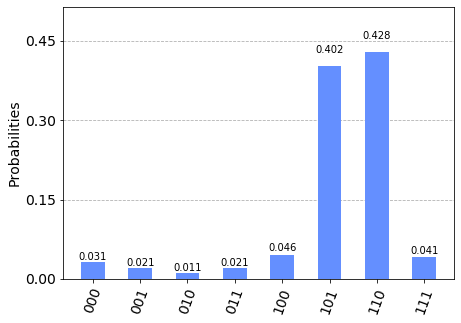

In [16]:
plot_histogram(getHisto(1024, circuit))

In [ ]:
#2^3k = n
#n = 1, k = 1/8
#n = 5, k = 5/8
#n = 5.5, average of 101 and 110, 5, 6